In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections
import os

colors = sns.color_palette('Set2', 20)

alphas=[0.001, 0.0001, 0.00001, 0.000001]
sns.set_context('poster')
sns.set_style('white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
sns.set_palette('Paired', 20)

lgn_fontsize = plt.rcParams['legend.fontsize']

import scipy.constants
kb = scipy.constants.Boltzmann

In [2]:
backmapping_energies = collections.defaultdict(list)
fields = None
for f in sorted(filter(lambda x: x.endswith('xvg'), os.listdir('backmapping_energy/')), key=lambda x: int(x.split('_')[2].replace('.xvg', ''))):
    if not f.endswith('xvg'):
        continue
    alp = float(f.split('_')[1])
    d = np.loadtxt(os.path.join('backmapping_energy/', f), skiprows=1)
    fields = {x: k for k, x in enumerate(open(os.path.join('backmapping_energy/', f), 'r').readline().split())}
    backmapping_energies[alp].append(d)

# Backmapping

## Backmapping temperature

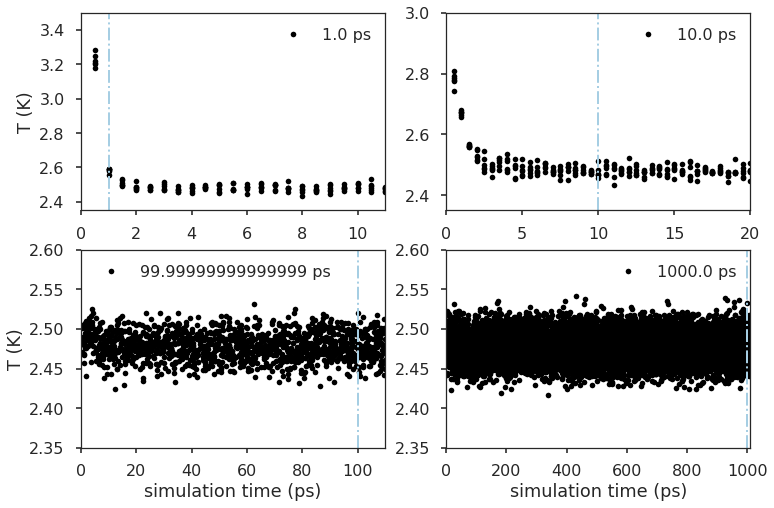

In [5]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.subplot(221)
alp = 0.001
for s in backmapping_energies[alp]:
    l, = plt.plot(s[:, fields['time']], s[:, fields['T']], 'k.')
plt.ylim([2.35, 3.5])
plt.ylabel('T (K)')
plt.axvline(x=0.0, linewidth=2)
plt.axvline(x=0.0+(1/alp)/1000, linewidth=2, linestyle='-.')
plt.xlim(xmin=0, xmax=10+(1/alp)/1000)
plt.legend([l], ['{} ps'.format(1.0/alp/1000)], loc=0)

plt.subplot(222)
alp = 0.0001
for s in backmapping_energies[alp]:
    l, = plt.plot(s[:, fields['time']], s[:, fields['T']], 'k.')
plt.ylim([2.35, 3])
plt.xlim(xmin=0, xmax=10+(1/alp)/1000)
plt.axvline(x=0.0, linewidth=2)
plt.axvline(x=0.0+(1/alp)/1000, linewidth=2, linestyle='-.')
plt.legend([l], ['{} ps'.format(1.0/alp/1000)], loc=0)

plt.subplot(223)
alp = 0.00001
for s in backmapping_energies[alp]:
    l, = plt.plot(s[:, fields['time']], s[:, fields['T']], 'k.')

plt.ylim([2.35, 2.6])
plt.axvline(x=0.0, linewidth=2)
plt.axvline(x=0.0+(1/alp)/1000, linewidth=2, linestyle='-.')
plt.xlim(xmin=0, xmax=10+(1/alp)/1000)
plt.ylim([2.35, 2.6])
plt.legend([l], ['{} ps'.format(1.0/alp/1000)], loc=0)
plt.ylabel('T (K)')
plt.xlabel('simulation time (ps)')

plt.subplot(224)
alp = 0.000001
for s in backmapping_energies[alp]:
    l, = plt.plot(s[:, fields['time']], s[:, fields['T']], 'k.')
    
plt.axvline(x=0.0, linewidth=2)
plt.axvline(x=0.0+(1/alp)/1000, linewidth=2, linestyle='-.')
plt.ylim([2.35, 2.6])
plt.xlim(xmin=0, xmax=10+(1/alp)/1000)
plt.legend([l], ['{} ps'.format(1.0/alp/1000)], loc=0)
plt.xlabel('simulation time (ps)')
plt.savefig('aa_temperature_change.pdf', dpi=200, tight_layout=True)

## Backmapping resolution

## Backmapping energy

In [3]:
pot_fields = [v for k, v in fields.items() if 'angle' in k or 'bond' in k or 'dih' in k or 'lj' in k or 'tab' in k]
angle_fields = [v for k, v in fields.items() if 'angle' in k]
bond_fields = [v for k, v in fields.items() if 'bond' in k]
dih_fields = [v for k, v in fields.items() if 'dih' in k]
nonbond_fields = [v for k, v in fields.items() if 'lj' in k or 'tab' in k]
tot_pot_fields = angle_fields + bond_fields + dih_fields + nonbond_fields

In [4]:
total_bond_energy7 = {}
total_angle_energy7 = {}
total_dih_energy7 = {}
total_nonbond_energy7 = {}
total_pot_energy7 = {}
for alp in backmapping_energies.keys():
    ss = []
    s = backmapping_energies[alp]
    for s1 in s:
        sum_f = np.sum(s1[:, bond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_bond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, angle_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_angle_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, dih_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_dih_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, nonbond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_nonbond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, tot_pot_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_pot_energy7[alp] = np.array(ss)

In [5]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = 0, 90000, 10000
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,4,i)
    for s in total_bond_energy7[alp]:
        l, = plt.plot(s[:, 0], s[:, 1], '-')
    #plt.legend([l], ['{} ps'.format(1/alp/1000)], loc=0)
    plt.axvline(x=0, linewidth=1.0, linestyle='--')
    plt.axvline(x=0+(1.0/alp/1000), linewidth=1.0, linestyle='--')
    plt.ylim([ymin, ymax])
    plt.xlim(xmin=0, xmax=10+(1.0/alp/1000))
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.yticks(range(ymin, ymax, ystep), range(ymin, ymax, ystep))
    else:
        plt.yticks(range(ymin, ymax, ystep), [])
    plt.xlabel('simulation time (ps)')
    plt.annotate('{} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)
#plt.xlim([0, 1200])
plt.tight_layout()

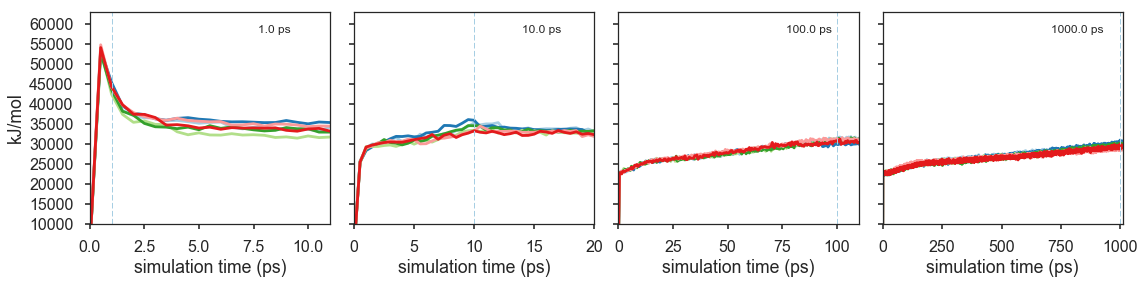

In [8]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = 10000, 63000, 5000
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,4,i)
    for s in total_angle_energy7[alp]:
        l, = plt.plot(s[:, 0], s[:, 1], '-')
    plt.annotate('{} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)
    plt.axvline(x=0, linewidth=1.0, linestyle='--')
    plt.axvline(x=0+(1.0/alp/1000), linewidth=1.0, linestyle='--')
    plt.ylim([ymin, ymax])
    plt.xlim(xmin=0, xmax=10+(1.0/alp/1000))
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.yticks(range(ymin, ymax, ystep), range(ymin, ymax, ystep))
    else:
        plt.yticks(range(ymin, ymax, ystep), [])
    plt.xlabel('simulation time (ps)')
#plt.xlim([0, 1200])
plt.tight_layout()

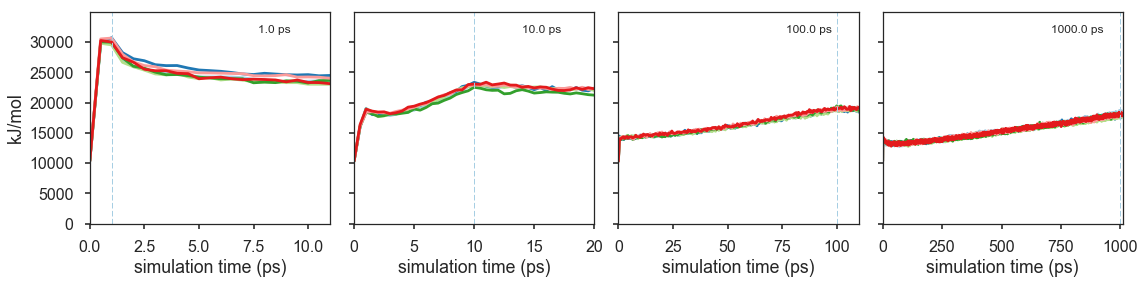

In [9]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = 0, 35000, 5000
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,4,i)
    for s in total_dih_energy7[alp]:
        l, = plt.plot(s[:, 0], s[:, 1], '-')
    plt.annotate('{} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)
    plt.axvline(x=0, linewidth=1.0, linestyle='--')
    plt.axvline(x=0+(1.0/alp/1000), linewidth=1.0, linestyle='--')
    plt.ylim([ymin, ymax])
    plt.xlim(xmin=0, xmax=10+(1.0/alp/1000))
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.yticks(range(ymin, ymax, ystep), range(ymin, ymax, ystep))
    else:
        plt.yticks(range(ymin, ymax, ystep), [])
    plt.xlabel('simulation time (ps)')
#plt.xlim([0, 1200])
plt.tight_layout()

In [6]:
plt.rcParams['figure.figsize'] = (16, 4)
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,4,i)
    for j, s in enumerate(total_nonbond_energy7[alp]):
        l, = plt.plot(s[:, 0], s[:, 1], '-')
    plt.annotate('{} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)
    plt.axvline(x=0, linewidth=1.0, linestyle='--')
    plt.axvline(x=0+(1.0/alp/1000), linewidth=1.0, linestyle='--')
    plt.ylim([-30000, 20000])
    plt.xlim(xmin=0, xmax=10+(1.0/alp/1000))
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.yticks(range(-30000, 20000, 5000), range(-30000, 20000, 5000))
    else:
        plt.yticks(range(-30000, 20000, 5000), [])
    plt.xlabel('simulation time (ps)')
#plt.xlim([0, 1200])
plt.tight_layout()

/home/teodor/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


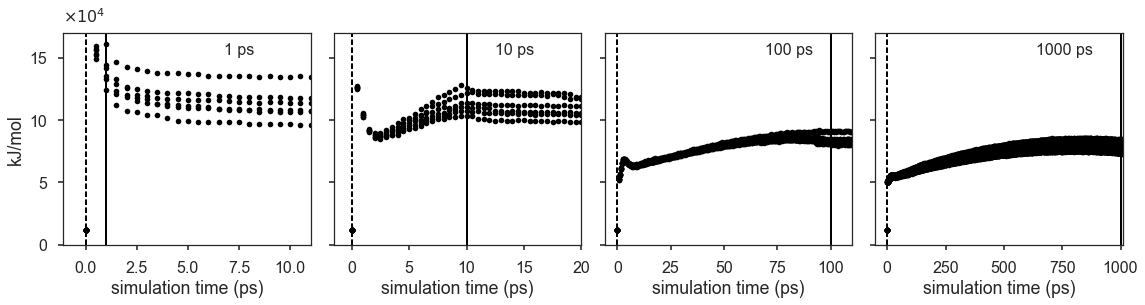

In [20]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = 0, 175000, 50000
m = 10**4
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,4,i)
    for j, s in enumerate(total_pot_energy7[alp]):
        l, = plt.plot(s[:, 0], s[:, 1]/m, 'k.')
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.65, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    plt.axvline(x=0, linewidth=2.0, linestyle='--', color='k')
    plt.axvline(x=0+(1.0/alp/1000), linewidth=2.0, linestyle='-', color='k')
    plt.ylim([ymin/m, ymax/m])
    plt.xlim(xmax=10+(1.0/alp/1000))
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, yticks)
    else:        
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')
#plt.xlim([0, 1200])
plt.tight_layout()
plt.savefig('aa_potential_bck.pdf', dpi=200, bbox_inches='tight')

# Equilibration

In [9]:
gmx_pot_energy = collections.defaultdict(list)
for f in os.listdir('eq_energy/'):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[1])
        d = np.loadtxt(os.path.join('eq_energy', f), comments=('@', '#'))
        gmx_pot_energy[alpha].append(d)

In [12]:
eq_header = {
    'time': 0,
    "bond": 1,
    "angle": 2,
    "propdih": 3,
    "rb_dih": 4,
    "lj-14": 5,
    "coulomb-14": 6,
    "lj": 7, 
    "coulomb": 8,
    "potential": 10
}

In [13]:
plt.rcParams['figure.figsize'] = (2*3.187, 4*2*3.187/1.618)
pot = 'potential'
ymin, ymax, ystep = -10000, 70000, 20000
m = 10**4
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(4,1,i)
    for s in l:
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, 'k.', markevery=50)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)

    elif i == 4:
        plt.xlabel('simulation time (ps)')
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.ylabel('kJ/mol')
    plt.yticks(yticks, yticks)
    
plt.tight_layout()
plt.savefig('aa_eq_potential.pdf', dpi=200, bbox_inches='tight')

/home/teodor/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [24]:
RT = 0.0083144621 * 298.0
print(20624 / (13540*RT))

0.6147574685457341


0.001 1.65591570653 0.210143042884 0.67960550882
0.0001 1.64840933012 0.155764987509 0.444338263407
1e-05 1.27884539756 0.0520739694401 0.15030422825
1e-06 1.22064738396 0.0889699613206 0.259908988465


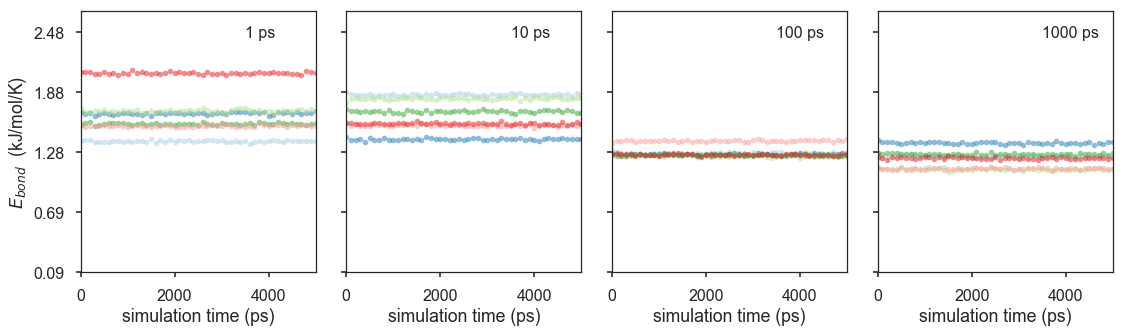

In [91]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'bond'
ymin, ymax, ystep = 3000, 90000, 20000
kT = kb*298.0
RT = 0.0083144621 * 298.0
m = 13513*RT
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('rim135_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0.454442841035 0.0135915850847 0.0424024854641
0.0001 0.454377751922 0.00690196313493 0.0208362627813
1e-05 0.441466511932 0.00470400879301 0.014757478321
1e-06 0.43202877699 0.00738954047522 0.0196838705763


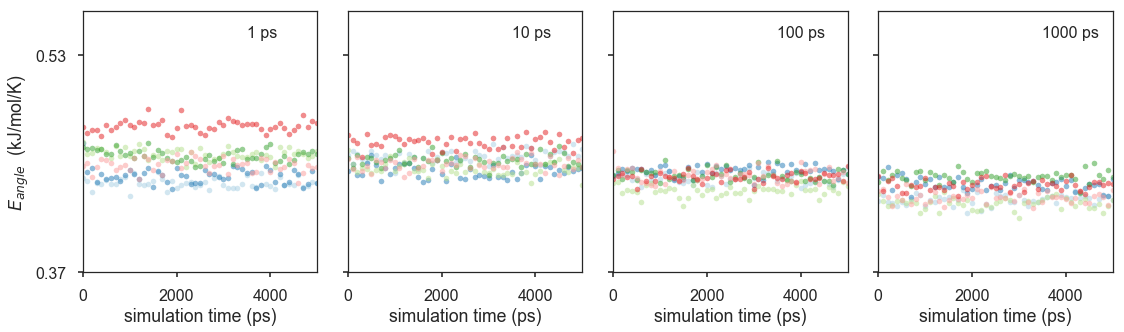

In [92]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'angle'
ymin, ymax, ystep = 23000, 35000, 10000
m = 24979*RT
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')      
    
plt.tight_layout()
plt.savefig('rim135_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0.196425495859 0.00512063465331 0.0158563753203
0.0001 0.19497046184 0.00434044348088 0.0132914173309
1e-05 0.186610625839 0.00201016616744 0.00559412454381
1e-06 0.185918243696 0.00178941142696 0.00491352386241


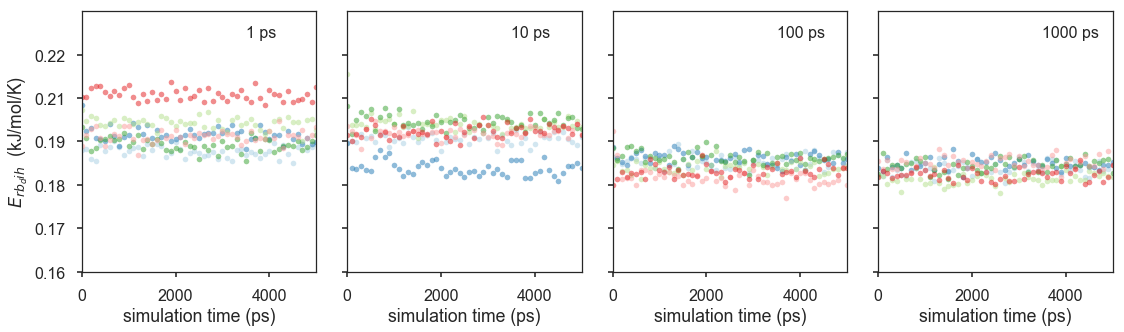

In [93]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'rb_dih'
ymin, ymax, ystep = 13000, 19000, 1000
m = 33389*RT
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('rim135_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

# RDF

In [27]:
%matplotlib inline
import numpy
from numpy import sqrt

In [65]:
rdfs = collections.defaultdict(dict) # at_name: alpha: rdfs
for f in sorted(os.listdir('rdf')):
    if f.endswith('xvg'):
        t = f.split('_')
        at_name = '_'.join(t[3:]).replace('.xvg', '')
        d = np.loadtxt(os.path.join('rdf', f), comments=('@', '#'), usecols=(0,1))
        alpha = float(t[2])
        if alpha not in rdfs[at_name]:
            rdfs[at_name][alpha] = []
        np.savetxt(os.path.join('rdf', f), d)
        rdfs[at_name][alpha].append(d)
print(rdfs.keys())

dict_keys(['C_H', 'C_N', 'C_N_excl', 'C_O', 'N_H', 'O_C', 'O_H', 'O_N', 'ring-ring'])


In [66]:
def smooth(x,window_len=11,window='hanning'):

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [67]:
avg_rdfs = collections.defaultdict(dict)
for at_name in rdfs:
    for i, (alpha, l) in enumerate(sorted(rdfs[at_name].items(), reverse=True), 1):
        avg_l = np.average(l, axis=0)
        std_l = np.std(l, axis=0)
        s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
        s[:, (0, 1)] = avg_l
        s[:, 2] = std_l[:, 1]
        avg_rdfs[at_name][alpha] = s

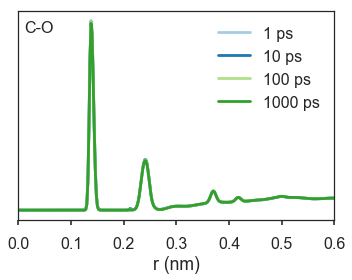

In [68]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_O'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.yticks([])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('aa_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

1e-06 1e-05 0.0252389611783
1e-06 0.0001 0.0337016945309
1e-06 0.001 0.0479976140882
1e-05 0.0001 0.0138340211697
1e-05 0.001 0.025833932136
0.0001 0.001 0.0205376226298
0.0278573076222


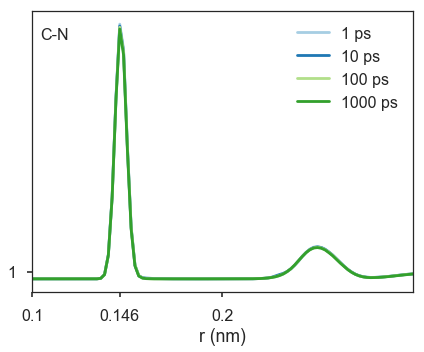

In [69]:
plt.rcParams['figure.figsize'] = (6, 5)
at_name = 'C_N'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 0.6])
plt.legend(loc=0)
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = smooth(avg_rdfs[at_name][alps[a1]][:, 1])
    for a2 in range(a1+1, len(alps)):
        d2 = smooth(avg_rdfs[at_name][alps[a2]][:, 1])
        rmse = sqrt(np.average(pow(d2-d1, 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.yticks([1])
plt.xticks([0.1, 0.146, 0.2], ['0.1', 0.146, '0.2'])
plt.xlim([0.1, 0.3])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('aa_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

1e-06 1e-05 0.0105629173159
1e-06 0.0001 0.0112639469104
1e-06 0.001 0.0112251800283
1e-05 0.0001 0.0116090936578
1e-05 0.001 0.0115790951479
0.0001 0.001 0.013087999168
0.0115547053714


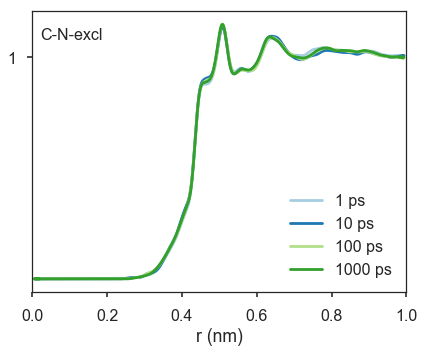

In [70]:
plt.rcParams['figure.figsize'] = (6, 5)
at_name = 'C_N_excl'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(smooth(d[:, 0], 20), smooth(d[:, 1], 20), label='{:.0f} ps'.format(1.0/alp/1000))
    #plt.xlim([0, 0.6])
# Calculate average RMSE between structures
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.legend(loc=4)
plt.yticks([1])
plt.xlim([0.0, 1.0])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('aa_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

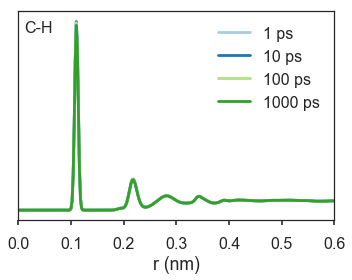

In [71]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_H'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.yticks([])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('aa_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

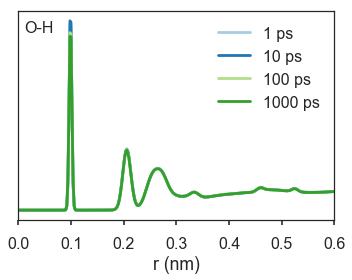

In [72]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'O_H'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.yticks([])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('aa_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

1e-06 1e-05 0.0229428129204
1e-06 0.0001 0.0190601367491
1e-06 0.001 0.0184167429403
1e-05 0.0001 0.0139551093288
1e-05 0.001 0.0218252687517
0.0001 0.001 0.0220097663197
0.0197016395017


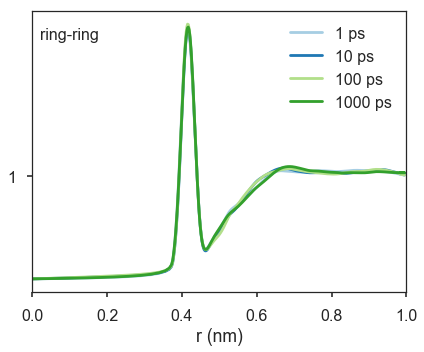

In [73]:
plt.rcParams['figure.figsize'] = (6, 5)
at_name = 'ring-ring'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(smooth(d[:, 0], 20), smooth(d[:, 1], 20), label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 1])
plt.legend(loc=0)
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = smooth(avg_rdfs[at_name][alps[a1]][:, 1])
    for a2 in range(a1+1, len(alps)):
        d2 = smooth(avg_rdfs[at_name][alps[a2]][:, 1])
        rmse = sqrt(np.average(pow(d2-d1, 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.yticks([1])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('aa_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

# Pull mechanism

In [75]:
pull_data = collections.defaultdict(dict)
for f in os.listdir('pull/'):
    if f.endswith('xvg'):
        direction = f.split('_')[1]
        alpha = float(f.split('_')[2])
        d = np.loadtxt(os.path.join('pull', f), comments=('@', '#'))
        if direction not in pull_data[alpha]:
            pull_data[alpha][direction] = []
        pull_data[alpha][direction].append(d)

for alp in pull_data:
    for d, l in pull_data[alp].items():
        print(alp, d, len(l))

0.001 x 2
0.001 z 1
0.001 y 1
1e-06 z 4
1e-06 y 3
1e-06 x 5
0.0001 x 3
0.0001 z 2
0.0001 y 2
1e-05 z 3
1e-05 x 3
1e-05 y 4


In [ ]:
import statsmodels.api as sm

def linregress(x, y, w=None):
    ret_tuple = collections.namedtuple('ret', ['slope', 'intercept', 'rvalue', 'std_intercept', 'std_slope'])
    X = sm.add_constant(x)
    if w is None:
        model = sm.OLS(y, X)
    else:
        model = sm.WLS(y, X, weights=1.0/w)
    result = model.fit()
    perr = np.sqrt(result.cov_params())
    out_vals = [result.params[1], result.params[0], np.sqrt(result.rsquared), perr[0][0], perr[1][1]]
    return ret_tuple(*out_vals)

In [6]:
def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


[ 53.90355739  57.44485971  55.87373078  57.13882532]
0.001 2.85 0.24
[ 54.93419318  55.22241447  54.56702548  54.12705436  51.96487835
  53.99192722  56.30525632]
0.0001 2.62 0.23
[ 56.37386656  56.85297236  58.78616371  54.27426656  55.72221453
  53.16699158  54.97938192  53.60415677  54.93238889  58.33794727]
1e-05 2.50 0.24
[ 61.72957951  59.08775123  55.18287978  52.44430719  56.48475208
  54.34903952  53.69643837  52.64048203  57.5711839   66.77678219
  57.28519571  65.21351737]
1e-06 2.86 0.24


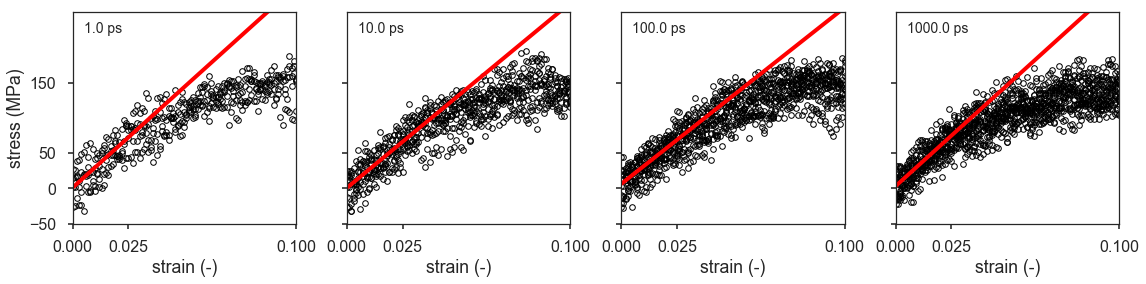

In [13]:
-

In [14]:
for alp, l in sorted(young_modulus.items(), reverse=True):
    for d, v in sorted(l.items()):
        print alp, d, '{:.4f} {:.4f}'.format(v[0]/1000, np.sqrt(v[1])/1000)

0.001 x 2.9158 0.2380
0.001 y 2.4760 0.2322
0.001 z 3.1096 0.2390
0.0001 x 2.6447 0.2314
0.0001 y 2.1422 0.2347
0.0001 z 3.0628 0.2348
1e-05 x 2.0801 0.2337
1e-05 y 2.8926 0.2378
1e-05 z 2.3984 0.2358
1e-06 x 2.7146 0.2322
1e-06 y 2.9791 0.2422
1e-06 z 2.9707 0.2484


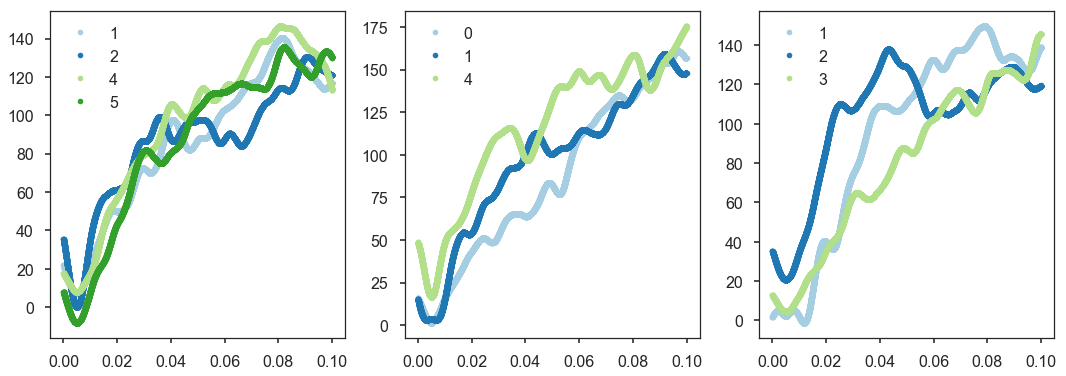

In [142]:
plt.rcParams['figure.figsize'] = (18, 6)
alp = 1e-06
plt.subplot(131)
for i, l in enumerate(pull_data[alp]['x']):
    strain = (l[:, 1]-l[:, 1][0])/l[:, 1][0]
    stress = -1.0*l[:, 4]/10
    if stress[0] > 30:
        continue
    stress_s = smooth(stress, window_len=1000)[:strain.shape[0]]
    plt.plot(strain, stress_s, '.', label=i)
plt.legend(loc=0)
    
plt.subplot(132)
for i, l in enumerate(pull_data[alp]['y']):
    strain = (l[:, 2]-l[:, 2][0])/l[:, 2][0]
    stress = -1.0*l[:, 5]/10
    if stress[0] > 30:
        continue
    stress_s = smooth(-1.0*l[:, 5]/10, window_len=1000)[:strain.shape[0]]
    plt.plot(strain, stress_s, '.', label=i)
plt.legend(loc=0)
    
plt.subplot(133)
for i, l in enumerate(pull_data[alp]['z']):
    strain = (l[:, 3]-l[:, 3][0])/l[:, 3][0]
    stress = -1.0*l[:, 6]/10
    if stress[0] > 30:
        continue
    stress_s = smooth(-1.0*l[:, 6]/10, window_len=1000)[:strain.shape[0]]
    plt.plot(strain, stress_s, '.', label=i)
plt.legend(loc=0)

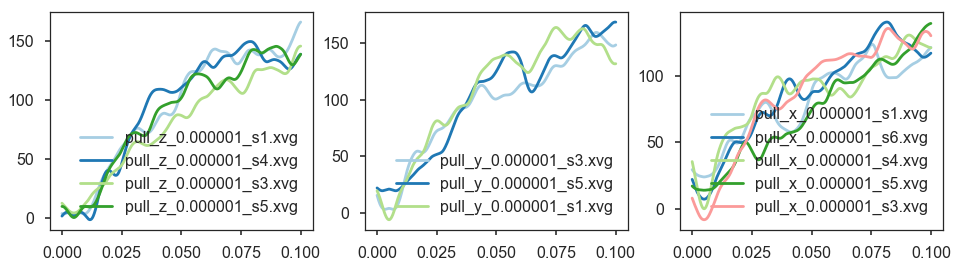

In [187]:
plt.rcParams['figure.figsize'] = (16, 4)
alp = 1e-6
plt.subplot(131)
for f in os.listdir('pull/'):
    if f.endswith('xvg'):
        direction = f.split('_')[1]
        alpha = float(f.split('_')[2])
        if direction != 'z' or alpha != alp:
            continue
        l = np.loadtxt(os.path.join('pull', f), comments=('@', '#'))
        strain = (l[:, 3]-l[:, 3][0])/l[:, 3][0]
        stress = -1.0*l[:, 6]/10
        stress_s = smooth(-1.0*l[:, 6]/10, window_len=1000)[:strain.shape[0]]
        plt.plot(strain, stress_s, label=f)
plt.legend(loc=0)

plt.subplot(132)
for f in os.listdir('pull/'):
    if f.endswith('xvg'):
        direction = f.split('_')[1]
        alpha = float(f.split('_')[2])
        if direction != 'y' or alpha != alp:
            continue
        l = np.loadtxt(os.path.join('pull', f), comments=('@', '#'))
        strain = (l[:, 2]-l[:, 2][0])/l[:, 2][0]
        stress = -1.0*l[:, 5]/10
        stress_s = smooth(-1.0*l[:, 5]/10, window_len=1000)[:strain.shape[0]]
        plt.plot(strain, stress_s, label=f)
plt.legend(loc=0)

plt.subplot(133)
for f in os.listdir('pull/'):
    if f.endswith('xvg'):
        direction = f.split('_')[1]
        alpha = float(f.split('_')[2])
        if direction != 'x' or alpha != alp:
            continue
        l = np.loadtxt(os.path.join('pull', f), comments=('@', '#'))
        strain = (l[:, 1]-l[:, 1][0])/l[:, 1][0]
        stress = -1.0*l[:, 4]/10
        stress_s = smooth(-1.0*l[:, 4]/10, window_len=1000)[:strain.shape[0]]
        plt.plot(strain, stress_s, label=f)
plt.legend(loc=0)

# Free volume

In [2]:
free_volume = collections.defaultdict(list)
for f in os.listdir('free_volume/'):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[1])
        d = np.loadtxt(os.path.join('free_volume', f), comments=('@', '#'))
        free_volume[alpha].append(d)

(0.001, 39.765058882235529, 1.7337060913652025)
(0.0001, 39.530440119760478, 1.1330975046293197)
(1e-05, 39.112369594145044, 1.7544988813933966)
(1e-06, 38.39365469061876, 0.25489899214635253)


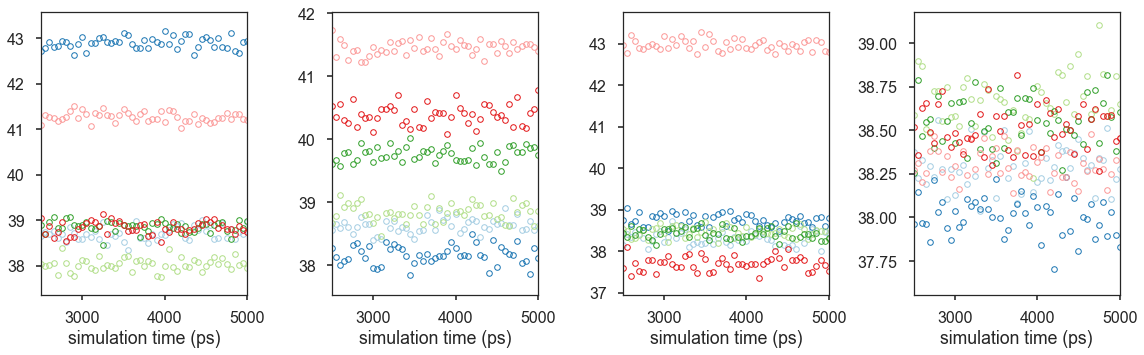

In [6]:
plt.rcParams['figure.figsize'] = (16, 5)
for i, (alp, l) in enumerate(sorted(free_volume.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    for s in l:
        k, = plt.plot(s[:, 0], s[:, 1], marker='.', 
                linestyle='None', 
                #color='k', 
                markerfacecolor='None', 
                markeredgewidth=1.0, markevery=10)
    avg_val = np.average(np.array(l)[:, :, 1])
    std_val = np.std(np.array(l)[:, :, 1])
    print(alp, avg_val, std_val)
    plt.xlabel('simulation time (ps)')     
    #plt.ylim([42.5, 44.5])
    plt.xlim([2500, 5000])
    
plt.tight_layout()

# H-bonds

In [2]:
hbonds = collections.defaultdict(list)
for f in sorted(os.listdir('hbond/'), key=lambda x: int(x.split('_')[1].replace('s', '')) if x.endswith('xvg') else -1):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[2].replace('.xvg', ''))
        d = np.loadtxt(os.path.join('hbond', f), comments=('@', '#'))
        hbonds[alpha].append(d)

(0.001, 304.1686626746507, 6.5144163795731647)
(0.0001, 292.72089155023286, 4.1063226329345204)
(1e-05, 297.2488356620093, 6.2630800169730918)
(1e-06, 297.14271457085829, 8.6951737412344681)


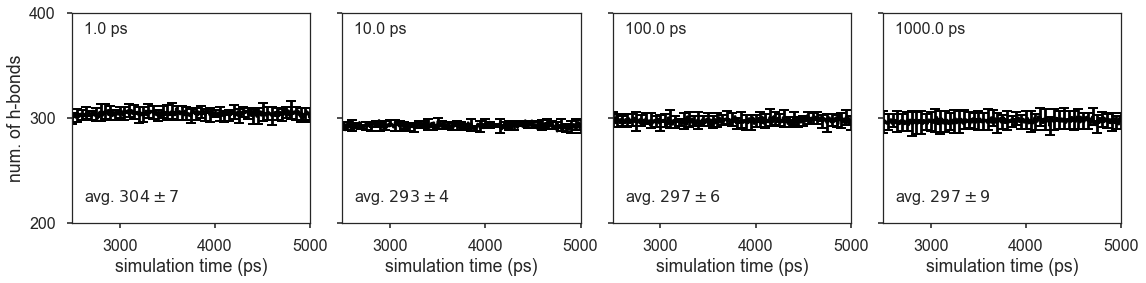

In [7]:
plt.rcParams['figure.figsize'] = (16, 4)
for i, (alp, l) in enumerate(sorted(hbonds.items(), reverse=True), 1):
    plt.subplot(1,4,i)
#     for j, s in enumerate(l):
#         k, = plt.plot(s[:, 0], s[:, 2], marker='.',  color='k', 
#                 linestyle='None',  
#                 markerfacecolor='None', 
#                 markeredgewidth=1.0, markevery=10)
    avg_val = np.average(np.array(l), axis=0)
    std_val = np.std(np.array(l), axis=0)
    plt.errorbar(avg_val[:, 0], avg_val[:, 2], std_val[:, 2], color='k', errorevery=10, capthick=2.0, capsize=5.0)
    avg_val = np.average(np.array(l)[:, :, 2])
    std_val = np.std(np.array(l)[:, :, 2])
    print(alp, avg_val, std_val)
    plt.annotate(
        r'avg. ${:.0f} \pm {:.0f}$'.format(avg_val, std_val), 
        xy=(0.05, 0.1), 
        xycoords='axes fraction',
        fontsize=lgn_fontsize)
    plt.annotate('{} ps'.format(0.001/alp), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=lgn_fontsize)
    plt.xlabel('simulation time (ps)')     
    plt.ylim([200, 400])
    plt.xlim([2500, 5000])
    if i == 1:
        plt.ylabel('num. of h-bonds')
        plt.yticks(range(200, 500, 100))
    else:
        plt.yticks(range(200, 500, 100), [])
plt.tight_layout()
plt.savefig('aa_num_hbonds.pdf', dpi=200)